<a href="https://colab.research.google.com/github/vinay-B-V-37/Tweet_Sentiment_analysis/blob/main/tweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Tweets.csv")

In [3]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df = data[['airline_sentiment', 'text']].copy()

In [5]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


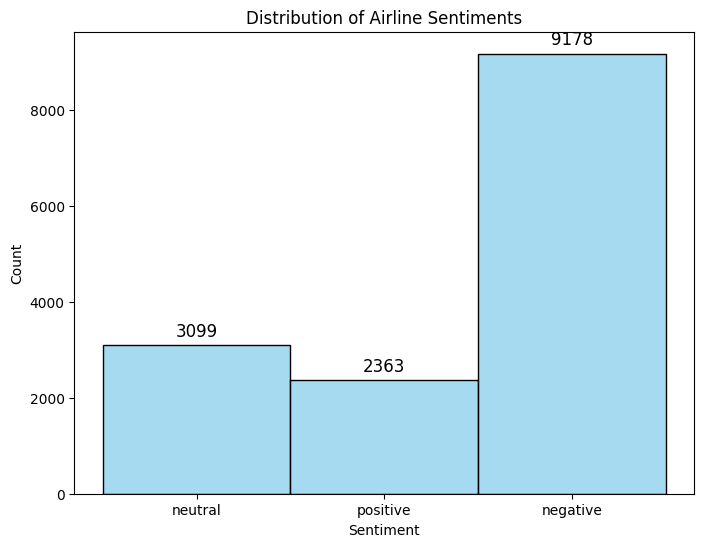

In [6]:
sentiment_counts = df['airline_sentiment'].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.histplot(df['airline_sentiment'], bins=3, color='skyblue', discrete=True)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Airline Sentiments')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, xytext=(0, 10), textcoords='offset points')

plt.xticks()
plt.show()

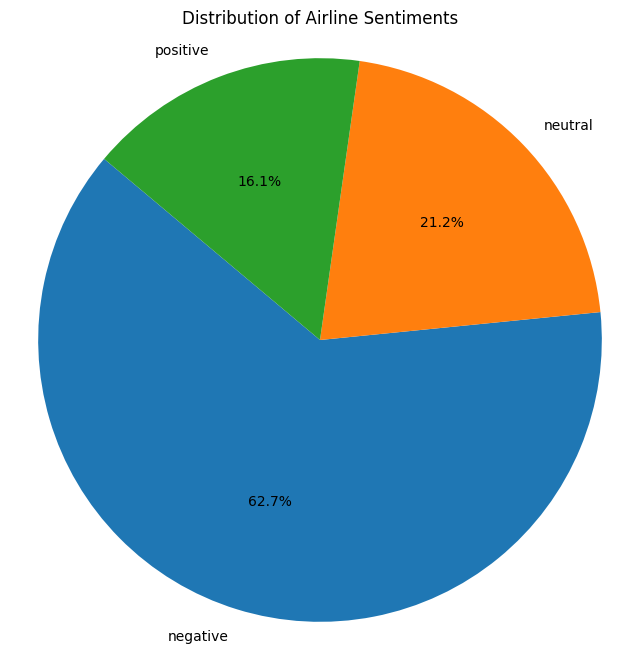

In [7]:
sentiment_counts = df['airline_sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Airline Sentiments')
plt.axis('equal')
plt.show()

In [8]:
target_map = {'positive': 1, 'negative': 0, 'neutral': 2}

df['airline_sentiment'] = df['airline_sentiment'].str.strip()
df['target'] = df['airline_sentiment'].map(target_map)

In [9]:
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [10]:
df_train, df_test = train_test_split(df)

In [11]:
df_train.head()

,airline_sentiment,text,target
6629,negative,@SouthwestAir how about when there are Cancell...,0
9575,negative,@USAirways Discovered our flight was Cancelled...,0
9033,negative,@USAirways She spoke with someone this AM and ...,0
13481,negative,@AmericanAir @MurphyJulie it took them 6 hours...,0
7247,neutral,"Happy for SFO, but hopefully you'll add PDX so...",2


In [12]:
vectorizer = TfidfVectorizer(max_features=2000)
x_train = vectorizer.fit_transform(df_train['text'])
x_test = vectorizer.transform(df_test['text'])
y_train = df_train['target']
y_test = df_test['target']


In [13]:
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [14]:
train_accuracy = model.score(x_train, y_train)
test_accuracy = model.score(x_test, y_test)
print('Train accuracy: ', train_accuracy)
print('Test accuracy: ', test_accuracy)

Train accuracy:  0.8569216757741348
Test accuracy:  0.8027322404371585


In [15]:

P_train = model.predict(x_train)
P_test = model.predict(x_test)

In [16]:
cm_train = confusion_matrix(y_train, P_train, normalize='true')
cm_train

array([[0.96507617, 0.00819201, 0.02673182],
       [0.19551466, 0.71190339, 0.09258194],
       [0.31449847, 0.0477442 , 0.63775734]])

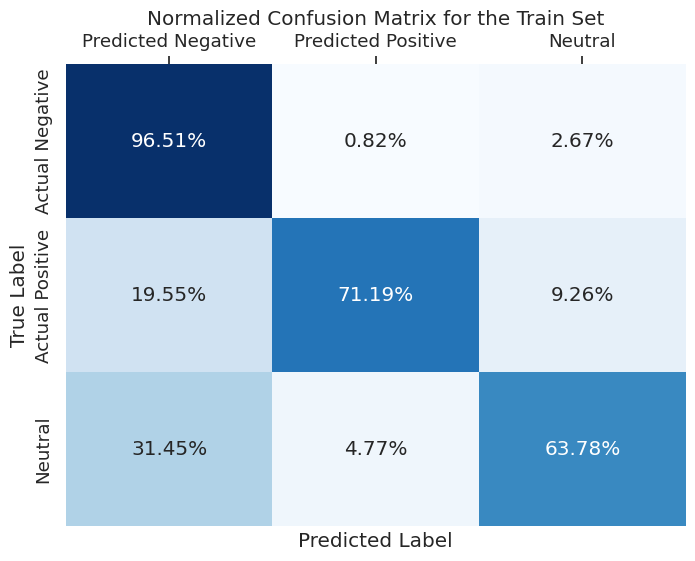

In [17]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
heatmap = sns.heatmap(cm_train, annot=True, fmt='.2%', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive', 'Neutral'],
            yticklabels=['Actual Negative', 'Actual Positive', 'Neutral'])
heatmap.xaxis.set_ticks_position('top')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix for the Train Set')
plt.show()